In [494]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [495]:
chess_data_filename = 'my_chess_data.csv'
chess_data = pd.read_csv(chess_data_filename, index_col='Date', parse_dates = True)
len(chess_data)

15784

Text(0, 0.5, 'Date')

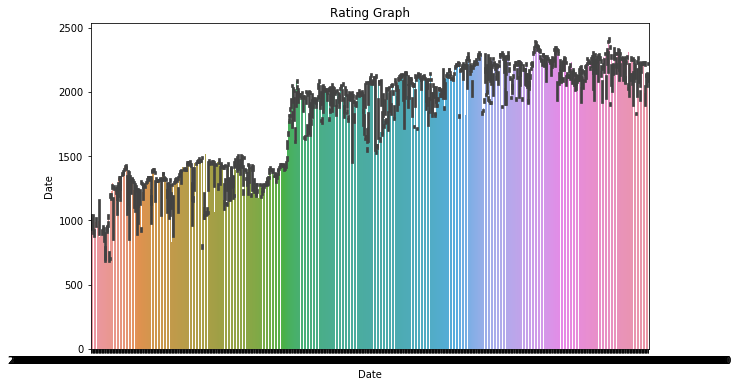

In [39]:
plt.figure(figsize=(10,6))
plt.title("Rating Graph")
sns.barplot(x=chess_data.index, y=chess_data['Player Rating'])
plt.ylabel("Date")

In [496]:
total_games = chess_data.shape[0]
num_wins = chess_data[chess_data['Player Result'] == 'Win'].shape[0]
num_losses = chess_data[chess_data['Opponent Result'] == 'Win'].shape[0]
draws = chess_data[chess_data['Player Result'].str.contains('Draw')].shape[0]
insufficient_material = chess_data[chess_data['Player Result'] == 'Insufficient material'].shape[0]
stalemates = chess_data[chess_data['Player Result'] == 'Stalemate'].shape[0]
num_draws = draws + insufficient_material + stalemates
frequency_data_dict = {'total_games': total_games, 'num_wins': num_wins, 'num_losses': num_losses, 'num_draws': num_draws}
frequency_data_df = pd.DataFrame.from_records([frequency_data_dict], index='total_games')
frequency_data_df

,num_wins,num_losses,num_draws
total_games,,,
15784,7163,7976,645


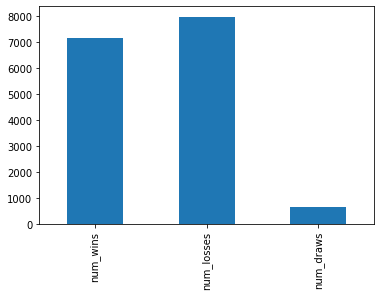

In [497]:
frequency_data_df.iloc[0].plot.bar()


In [498]:
chess_data['Rating Difference'] = chess_data['Opponent Rating'] - chess_data['Player Rating']
chess_data['Rating Difference']

Date
2013-07-24    192
2013-07-24     56
2013-07-24    179
2013-07-24    -70
2013-07-24   -141
             ... 
2020-07-19    126
2020-07-19     95
2020-07-19    145
2020-07-19     26
2020-07-19    138
Name: Rating Difference, Length: 15784, dtype: int64

In [499]:
from sklearn import preprocessing

In [500]:
label_enc = preprocessing.LabelEncoder()
termination = label_enc.fit_transform(list(chess_data['Player Result']))
opening_var = label_enc.fit_transform(list(chess_data['Variation']))

In [501]:
def unique(list1): 
    unique_list = []  
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x) 
    return unique_list

In [502]:
chess_data['My_Result'] = termination
chess_data['My_Result']

Date
2013-07-24     7
2013-07-24     1
2013-07-24     7
2013-07-24     2
2013-07-24    10
              ..
2020-07-19    10
2020-07-19     9
2020-07-19     7
2020-07-19     2
2020-07-19     9
Name: My_Result, Length: 15784, dtype: int64

In [503]:
chess_data['Opening_Variation'] = opening_var
chess_data['Opening_Variation']

Date
2013-07-24      65
2013-07-24     677
2013-07-24    1105
2013-07-24     906
2013-07-24     732
              ... 
2020-07-19     259
2020-07-19    1424
2020-07-19     503
2020-07-19    1769
2020-07-19     586
Name: Opening_Variation, Length: 15784, dtype: int64

In [504]:
def format_time(num):
    if num.find('+') != -1:
        list = num.split('+')
        numA = float(list[0])
        numB = float(list[1])
        return numA + numB
    elif num.find('/') != -1:
        list = num.split('/')
        num = float(list[1])
        return num
    return float(num)
chess_data['Time Class'] = chess_data['Time Class'].apply(lambda l: format_time(l))
chess_data['Time Class'].astype(float)

Date
2013-07-24    1800.0
2013-07-24    1800.0
2013-07-24     600.0
2013-07-24     600.0
2013-07-24    1800.0
               ...  
2020-07-19     180.0
2020-07-19     180.0
2020-07-19     180.0
2020-07-19     180.0
2020-07-19     180.0
Name: Time Class, Length: 15784, dtype: float64

In [505]:
label_encoder = preprocessing.LabelEncoder()
my_color = label_encoder.fit_transform(list(chess_data['Player Side']))
chess_data['Opening_Variation'].astype(float)
chess_data['Color'] = my_color

In [506]:
my_color

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [507]:
final_data = chess_data.loc[chess_data.index.year >= 2018]

In [508]:
final_data

,Player,Player Rating,Player Nationality,Player Side,Player Result,Player First Move,Opponent,Opponent Rating,Opponent Nationality,Opponent Side,...,Moves,Tournament,Event,Time Class,Time Control,FEN,Rating Difference,My_Result,Opening_Variation,Color
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-22,Dontmesswithme_2,1390,United States of America,White,Win,d4,Joashjoash,1382,United States of America,Black,...,22.0,None,Live Chess,180.0,blitz,r3rk2/pp4Q1/q3b3/3RB3/2p5/2P1P3/PPB2PPP/2K4R b...,-8,10,1768,1
2018-05-22,Dontmesswithme_2,1417,United States of America,Black,Win,Nf6,Joashjoash,1374,United States of America,White,...,44.0,None,Live Chess,180.0,blitz,B7/6k1/1p1p4/3Pp3/5n2/P3q3/1K6/8 w - -,-43,10,0,0
2018-05-22,Dontmesswithme_2,1389,United States of America,White,Resigned,d4,Chris_Rincon,1382,United States of America,Black,...,2.0,None,Live Chess,180.0,blitz,rnbqkbnr/pppppp1p/8/8/3P1p2/8/PPP1PPPP/RN1QKBN...,-7,7,1799,1
2018-05-22,Dontmesswithme_2,1411,United States of America,White,Win,d4,marcosrodrigomuller,1348,Brazil,Black,...,9.0,None,Live Chess,180.0,blitz,r1bq1rk1/ppp2ppp/3b4/3pP2n/8/3BP1B1/PPPN1PPP/R...,-63,10,1769,1
2018-05-22,Dontmesswithme_2,1432,United States of America,Black,Win,a6,suriel62,1387,United States of America,White,...,28.0,None,Live Chess,180.0,blitz,r4rk1/1b2b1p1/p4p2/4pP2/2Pp4/7p/P3QNqP/2R2R1K ...,-45,10,1886,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-19,Dontmesswithme_2,2231,United States of America,White,Win,d4,magelan59,2357,Serbia,Black,...,36.0,None,Live Chess,180.0,blitz,8/8/1R6/p5k1/8/1Pn2P1P/2r2PB1/6K1 b - -,126,10,259,1
2020-07-19,Dontmesswithme_2,2225,United States of America,White,Timeout,d4,fabi2005,2320,United States of America,Black,...,44.0,None,Live Chess,180.0,blitz,8/8/3p1kpb/3Ppp1p/4P3/3K1N2/8/8 w - -,95,9,1424,1
2020-07-19,Dontmesswithme_2,2220,United States of America,White,Resigned,d4,SvenskWiking,2365,Sweden,Black,...,27.0,None,Live Chess,180.0,blitz,4r1k1/1q2np1p/5bp1/p7/8/P3QNPP/5PK1/8 w - -,145,7,503,1


In [509]:
features = ['Player Rating', 'Opponent Rating', 'Time Class', 'Rating Difference', 'Color', 'Opening_Variation', 'Moves']
pred = ['Termination']


In [510]:
X = final_data[features]
y = final_data[pred]

In [511]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)

In [512]:
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(x_train, y_train)

C:\Users\shaak\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [513]:
model.score(x_test, y_test)

0.19360764144011755

In [514]:
chess_data['Termination'].unique()

array(['badar1945 won by resignation', 'mikeofri101107 won by checkmate',
       'deschuter won by resignation', ..., 'AGW2016 won by checkmate',
       'SvenskWiking won by resignation', 'AndrewSamuelson won on time'],
      dtype=object)

In [515]:
def change_termination(result):
    if result.find('Dontmesswithme_2') != -1:
        return 1
    elif result.find('draw') != -1:
        return 0
    else:
        return -1


In [516]:
chess_data['Result'] = chess_data['Termination']

In [517]:
chess_data['Result'] = chess_data['Result'].apply(lambda l: change_termination(l))

In [518]:
chess_data['Result'].unique()

array([-1,  0,  1], dtype=int64)

In [519]:
chess_data['Result']

Date
2013-07-24   -1
2013-07-24   -1
2013-07-24   -1
2013-07-24    0
2013-07-24    1
             ..
2020-07-19    1
2020-07-19   -1
2020-07-19   -1
2020-07-19    0
2020-07-19   -1
Name: Result, Length: 15784, dtype: int64

In [520]:
pred = chess_data['Result']
chess_data['Result'].astype(float)
final_data = chess_data.loc[chess_data.index.year >= 2018]
final_data.columns

Index(['Player', 'Player Rating', 'Player Nationality', 'Player Side',
       'Player Result', 'Player First Move', 'Opponent', 'Opponent Rating',
       'Opponent Nationality', 'Opponent Side', 'Opponent Result',
       'Opponent First Move', 'Opening', 'Variation', 'Termination', 'Moves',
       'Tournament', 'Event', 'Time Class', 'Time Control', 'FEN',
       'Rating Difference', 'My_Result', 'Opening_Variation', 'Color',
       'Result'],
      dtype='object')

In [521]:
features = ['Player Rating', 'Opponent Rating', 'Time Class', 'Rating Difference', 'Color', 'Moves', 'Opening_Variation', 'Move One']
final_data['Time Control'].unique()

array(['blitz', 'bullet', 'rapid', 'daily'], dtype=object)

In [522]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
my_data = final_data.loc[final_data['Time Control'] != 'bullet']
my_data = my_data.loc[my_data['Time Control'] != 'daily']
my_data = my_data.loc[my_data['Player First Move'] == 'd4']
my_data = my_data.loc[my_data['Opponent'] != 'wang5ter']
my_data = my_data.loc[my_data['Opponent'] != 'king_kunal']


In [523]:
my_first_data = my_data.loc[my_data['Color'] == 1]
my_first_move = label_enc.fit_transform(list(my_first_data['Player First Move']))
opp_first_move = label_enc.fit_transform(list(my_first_data['Opponent First Move']))
my_first_data['Move One'] = my_first_move + opp_first_move

In [524]:
import numpy as np
X = np.array(my_first_data[features])
y = np.array(my_first_data['Result'])
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 1) 

In [525]:
clf = DecisionTreeClassifier()
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)

In [526]:
print("Accuracy:",metrics.accuracy_score(test_y, pred))

Accuracy: 0.5920550038197097


In [527]:
len(my_first_data)

4363

In [528]:
my_second_data = final_data.loc[final_data['Time Control'] != 'bullet']
my_second_data = my_second_data.loc[my_second_data['Time Control'] != 'daily']
my_second_data = my_second_data.loc[my_second_data['Player First Move'] != 'e6']
my_second_data = my_second_data.loc[my_second_data['Opponent'] != 'wang5ter']
my_second_data = my_second_data.loc[my_second_data['Color'] == 0]

In [529]:
my_second_data['Player First Move'].unique()
my_black_first_move = label_enc.fit_transform(list(my_second_data['Player First Move']))
his_white_first_move = label_enc.fit_transform(list(my_second_data['Opponent First Move']))
features = ['Player Rating', 'Opponent Rating', 'Time Class', 'Rating Difference', 'Color', 'Moves', 'Opening_Variation', 'Move One']
my_second_data['Move One'] = my_black_first_move + his_white_first_move

In [530]:
f = np.array(my_second_data[features])
t = np.array(my_second_data['Result'])
tr_X, te_X, tr_y, te_y = train_test_split(f, t, test_size = 0.3, random_state = 1)
classifier = DecisionTreeClassifier()
classifier = classifier.fit(tr_X, tr_y)
pred_y = classifier.predict(te_X)
print("Accuracy:", metrics.accuracy_score(te_y, pred_y))

Accuracy: 0.5841121495327103


In [476]:
my_second_data.columns

Index(['Player', 'Player Rating', 'Player Nationality', 'Player Side',
       'Player Result', 'Player First Move', 'Opponent', 'Opponent Rating',
       'Opponent Nationality', 'Opponent Side', 'Opponent Result',
       'Opponent First Move', 'Opening', 'Variation', 'Termination', 'Moves',
       'Tournament', 'Event', 'Time Class', 'Time Control', 'FEN',
       'Rating Difference', 'My_Result', 'Opening_Variation', 'Color',
       'Result', 'Move One'],
      dtype='object')

In [465]:
my_second_data

,Player,Player Rating,Player Nationality,Player Side,Player Result,Player First Move,Opponent,Opponent Rating,Opponent Nationality,Opponent Side,...,Event,Time Class,Time Control,FEN,Rating Difference,My_Result,Opening_Variation,Color,Result,Move One
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-22,Dontmesswithme_2,1417,United States of America,Black,Win,Nf6,Joashjoash,1374,United States of America,White,...,Live Chess,180.0,blitz,B7/6k1/1p1p4/3Pp3/5n2/P3q3/1K6/8 w - -,-43,10,0,0,1,12
2018-05-22,Dontmesswithme_2,1432,United States of America,Black,Win,a6,suriel62,1387,United States of America,White,...,Live Chess,180.0,blitz,r4rk1/1b2b1p1/p4p2/4pP2/2Pp4/7p/P3QNqP/2R2R1K ...,-45,10,1886,0,1,16
2018-06-08,Dontmesswithme_2,1392,United States of America,Black,Resigned,c5,libertad88,1467,Puerto Rico,White,...,Live Chess,300.0,blitz,r2q1rk1/1b1nbppp/p2ppn2/1p4N1/4P3/2N1Q3/PPPBBP...,75,7,151,0,-1,18
2018-07-11,Dontmesswithme_2,1445,United States of America,Black,Win,e5,jeudecon,1329,France,White,...,Live Chess,180.0,blitz,8/p7/3p1k2/8/8/8/6q1/4Kr2 w - -,-116,10,1099,0,1,22
2018-07-11,Dontmesswithme_2,1462,United States of America,Black,Win,Nf6,Chakistul94,1464,United Kingdom of Great Britain and Northern I...,White,...,Live Chess,180.0,blitz,8/ppp4p/4p1p1/PPk5/2P1P1Pb/2K2P2/8/8 w - -,2,10,1344,0,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-18,Dontmesswithme_2,2214,United States of America,Black,Resigned,Nf6,visibleman,2213,United States of America,White,...,Live Chess,180.0,blitz,5r1k/1QR4p/2Pp2pb/3Bpp2/P2qP3/6PP/5P2/6K1 b - -,-1,7,1307,0,-1,12
2020-07-18,Dontmesswithme_2,2206,United States of America,Black,Checkmated,c5,AGW2016,2212,United States of America,White,...,Live Chess,180.0,blitz,r1bqkb1r/pp2pBpp/1nn5/4N3/3P4/8/PP3PPP/RNBQK2R...,6,1,108,0,-1,18
2020-07-18,Dontmesswithme_2,2222,United States of America,Black,Win,c5,AGW2016,2196,United States of America,White,...,Live Chess,180.0,blitz,6k1/R4p2/5r2/7p/6pP/6P1/3R1PK1/2r5 w - -,-26,10,127,0,1,18
